# 1D Quantum System

### Esercizio 8.1/8.2

Per l'ottimizzazione dei parametri $\mu$ e $\sigma$ è stato implementato un Simulated Annealing.
I valori di partenza per i due parametri vengono passati all'algoritmo in input tramite il file *input.dat*. Si sceglie una temperatura iniziale di $T = 0.0025$ e un passo uniforme $\epsilon = 0.1$. Vengono eseguiti tre 'cicli' di ottimizzazione di $M = 100$ passi, all'inizio di ciascun turno la tempertatura viene ridotta di $\frac{1}{5}T$.

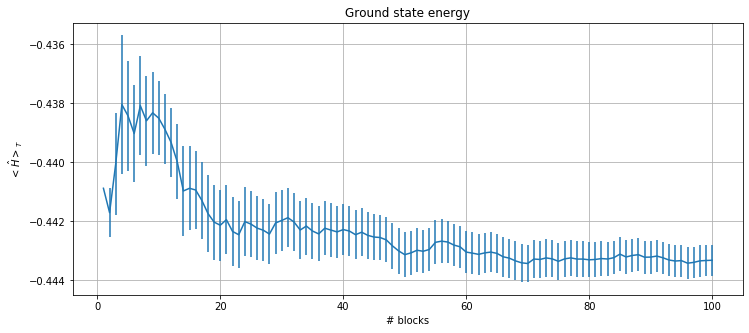

mu: -0.801153 	 sigma: 0.607702


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

x,f,error = np.loadtxt("VMC/gs_energy.out", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f, yerr=error)

ax.set_title('Ground state energy')
ax.set_xlabel('# blocks')
ax.set_ylabel('$<\hat{H}>_T$')
ax.grid(True)
plt.show()

mu, sigma, norm = np.loadtxt("VMC/parameters.out", usecols=(0,1,2), delimiter=' ', unpack='true')

print(f'mu: {mu} \t sigma: {sigma}')

Real ground state energy:  -0.46046587969271535
Trial ground state energy:  -0.443316


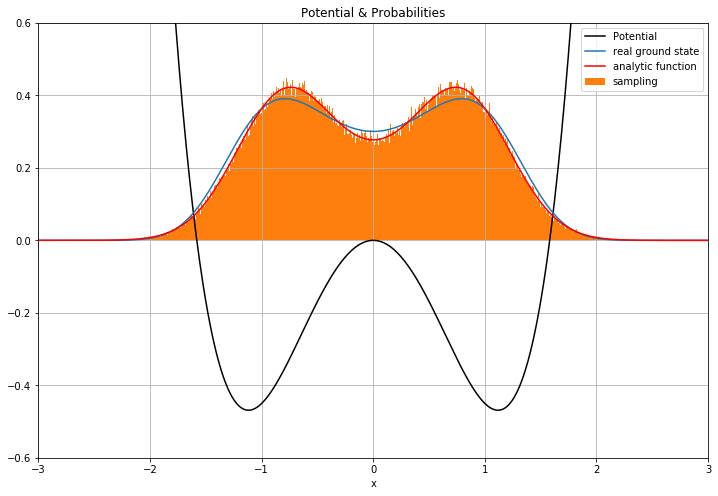

In [41]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def psi_T(x):
    return (exp(- (x-mu)**2 / (2*sigma**2) ) + exp(- (x+mu)**2 / (2*sigma**2)))
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

an_psi = np.zeros(len(x))
for i in range(len(x)):
    an_psi[i] = psi_T(x[i])

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Real ground state energy: ", E[0])
print("Trial ground state energy: ", f[-1])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(12,8))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
# Soluzione esatta
plt.plot(x,(psi[0])**2, label="real ground state")
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)

# Psi**2 analitico
plt.plot(x,(an_psi)**2/norm, c="r", label="analytic function")

# Simulazione
psi_sim = np.loadtxt("VMC/psi.dat", usecols=(0), delimiter=' ', unpack='true')
plt.hist(psi_sim, 1000, density=True, label="sampling")

plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

I parametri $\mu$ e $\sigma$ che minimizzano $<\hat{H}>_T$ ottenuti dal codice approssimano abbastanza bene il vero ground state.

### Esercizio 8.3

#### PIGS

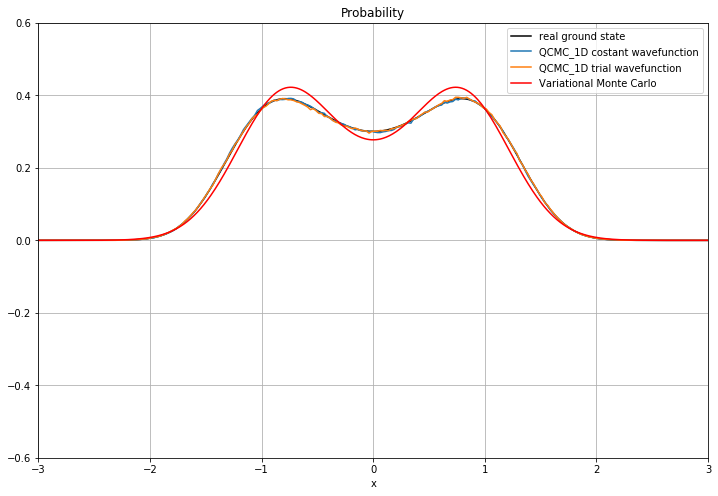

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x = np.linspace(-a/2, a/2, N)
ax.plot(x,(psi[0])**2, label="real ground state", c='black')

x, trial = np.loadtxt("QMC_1D/pigs_const/probability8.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='QCMC_1D costant wavefunction')

x, trial = np.loadtxt("QMC_1D/pigs_trial/probability8.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='QCMC_1D trial wavefunction')

x = np.linspace(-a/2, a/2, N)
ax.plot(x,(an_psi)**2/norm, c="r", label="Variational Monte Carlo")

ax.set_title('Probability')
ax.set_xlabel("x")
ax.grid(True)
ax.set_xlim((-3,3))
ax.set_ylim((-0.6,0.6))
ax.legend()

plt.show()

Il codice *Quantum MonteCarlo 1D* presenta prestazioni superiori al *Variational Monte Carlo*, riuscendo a campionare il vero ground state.

#### Imaginary Time Propagation

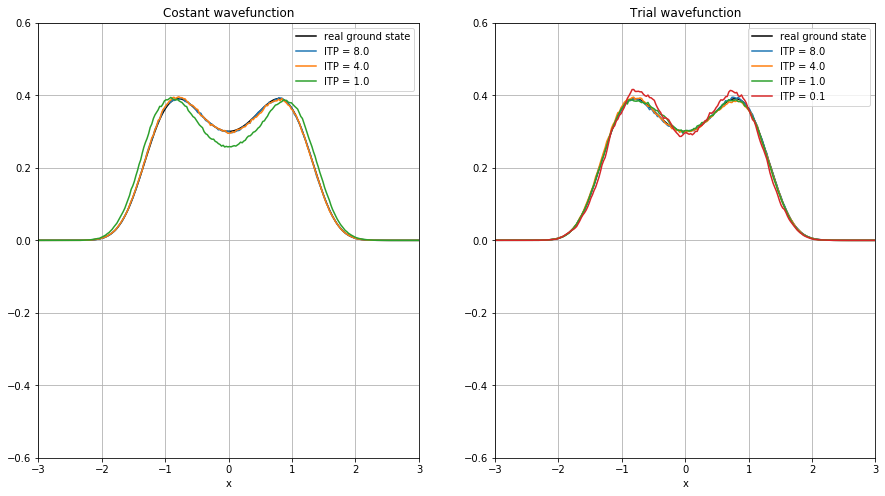

In [54]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


x = np.linspace(-a/2, a/2, N)
ax.plot(x,(psi[0])**2, label="real ground state", c='black')
x, trial = np.loadtxt("QMC_1D/pigs_const/probability8.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='ITP = 8.0')
x, trial = np.loadtxt("QMC_1D/pigs_const/probability4.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='ITP = 4.0')
x, trial = np.loadtxt("QMC_1D/pigs_const/probability1.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='ITP = 1.0')

ax.set_title('Costant wavefunction')
ax.set_xlabel("x")
ax.grid(True)
ax.set_xlim((-3,3))
ax.set_ylim((-0.6,0.6))
ax.legend()


x = np.linspace(-a/2, a/2, N)
ax2.plot(x,(psi[0])**2, label="real ground state", c='black')
x, trial = np.loadtxt("QMC_1D/pigs_trial/probability8.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='ITP = 8.0')
x, trial = np.loadtxt("QMC_1D/pigs_trial/probability4.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='ITP = 4.0')
x, trial = np.loadtxt("QMC_1D/pigs_trial/probability1.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='ITP = 1.0')
x, trial = np.loadtxt("QMC_1D/pigs_trial/probability01.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='ITP = 0.1')

ax2.set_title('Trial wavefunction')
ax2.set_xlabel("x")
ax2.grid(True)
ax2.set_xlim((-3,3))
ax2.set_ylim((-0.6,0.6))
ax2.legend()

plt.show()

Per la funzione d'onda costante è necessaria una proiezione per tempi immaginari maggiore in quanto serve mandare esponenzialmente a zero la sovrapposizione con qualche stato eccitatati. La funzione di test, in quanto ottimizzata, non sono necessari tempi ugualmente elevati.

#### PIMC

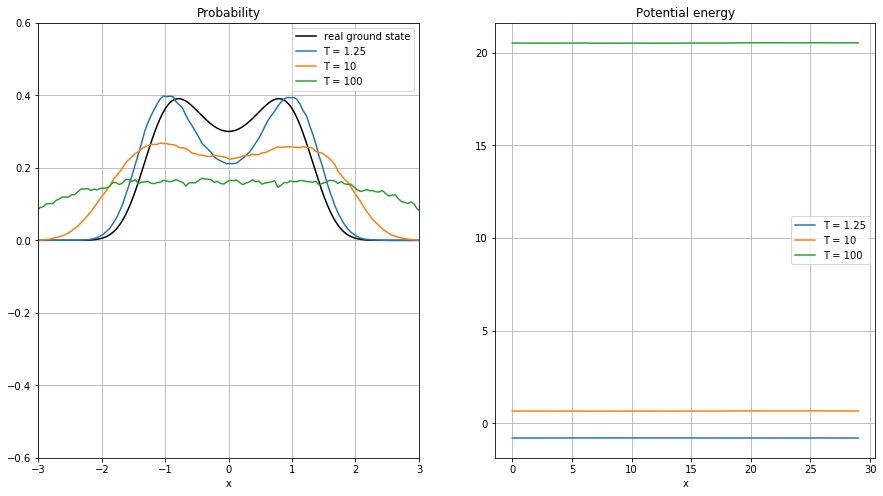

In [55]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


x = np.linspace(-a/2, a/2, N)
ax.plot(x,(psi[0])**2, label="real ground state", c='black')
x, trial = np.loadtxt("QMC_1D/pimc/probability1.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='T = 1.25')
x, trial = np.loadtxt("QMC_1D/pimc/probability10.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='T = 10')
x, trial = np.loadtxt("QMC_1D/pimc/probability100.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,trial, label='T = 100')

ax.set_title("Probability")
ax.set_xlabel("x")
ax.grid(True)
ax.set_xlim((-3,3))
ax.set_ylim((-0.6,0.6))
ax.legend()

x, trial = np.loadtxt("QMC_1D/pimc/potential1.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='T = 1.25')
x, trial = np.loadtxt("QMC_1D/pimc/potential10.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='T = 10')
x, trial = np.loadtxt("QMC_1D/pimc/potential100.dat", usecols=(0,1), delimiter=' ', unpack='true')
ax2.plot(x,trial, label='T = 100')

ax2.set_title("Potential energy")
ax2.set_xlabel("x")
ax2.grid(True)
ax2.legend()

plt.show()

All'aumentare dell'energia con la temperatura vengono popolati anche gli stati eccitati, permettendo di visitare zone in cui il potenziale è più alto. Conseguenza di questo è una espansione della densità di probabilità che è diventato il modulo quadro di una miscela di funzioni d'onda.